<a href="https://colab.research.google.com/github/dinsor17/k/blob/main/Visualization_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

จากข้อมูลต่อสองตารางนี้ 
https://drive.google.com/file/d/1nu5kbf998xuMxll6eAJRVHEDbdo3v63D/view?usp=sharing  (ผู้ติดเชื้อ covid-19 กับ จำนวนผู้เดินทางใน)

ข้อสอบแบ่งเป็น 2 ส่วน 
1. Colab Notebook นี้ ให้สร้างกราฟเพื่อตามโจทย์ที่กำหนด
2. ใช้ Google Data Studio สร้าง Dashboard แสดงข้อมูลสำคัญ (ข้อมูลที่นักศึกษาเห็นว่าสำคัญและน่าสนใจที่จะนำมาแสดง) และอัดวิดีโออธิบาย Dashboard นั้น แล้วอัพโหลดวิดีโอลง youtube ในรูปแบบ unlist

*commit colab ข้อ 1 เป็น ชื่อ link youtube ที่อัพโหลดในข้อ 2 แล้วไปเพิ่มข้อมูลเวลา submit ใน google sheet นี้ https://docs.google.com/spreadsheets/d/1dxHoPftXEmK1ZRs2OAjAA7DbS-YdZBXzkXz_qiZteUg/edit?usp=sharing


**ส่วนที่ 1**

สร้างกราฟเพื่อแสดงข้อมูลต่อไปนี้ (ข้อละอย่างน้อย 1 กราฟ)
1. เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน
2. เปรียบเทียบวิธีการเดินทางของคนเป็นรายเดือนเทียบกับจำนวนผู้ป่วยในเดือนนั้นๆ
3. เปรียบเทียบ จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของจังหวัด top 10 ของ 6 เดือนล่าสุด
4. เปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค (5 ภูมิภาค (การท่องเที่ยว)) ตามข้อมูลใน https://th.wikipedia.org/wiki/ภูมิภาคของประเทศไทย 
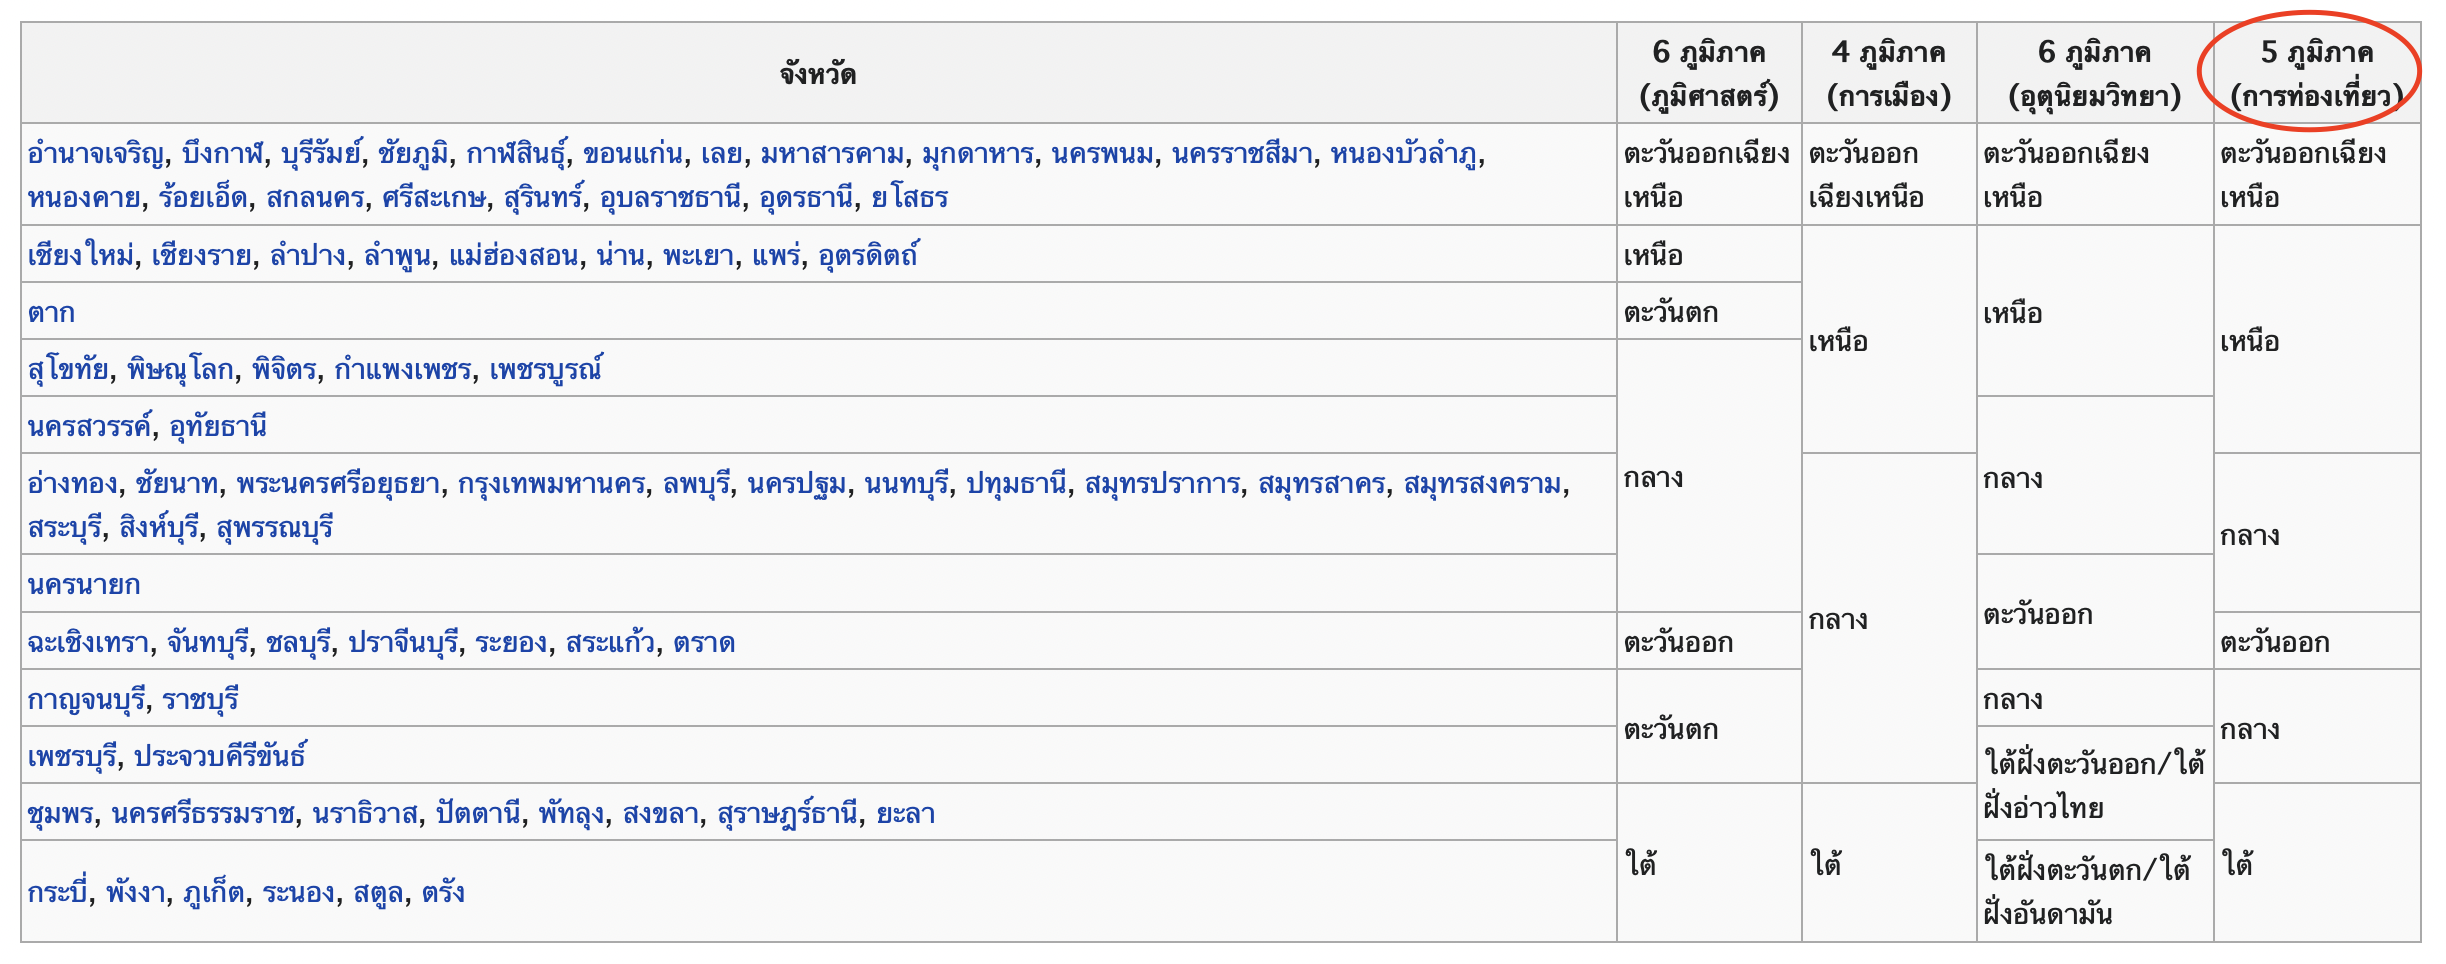



กำหนดส่ง ไม่เกิน 4 พฤษภาคม 2564 เวลา 23.59

##อันดับแรกคือดึงข้อมูลที่ต้องใช้

In [1]:
#การเรียกใช้ package ที่ชื่อว่า pandas และเปลี่ยนชื่อ pandas เป็นชื่อย่อๆว่า pd
import pandas as pd

In [2]:
#เชื่อมต่อกับ Google drive หรือนำไฟล์จาก Drive มาที่ google colab
from google.colab import drive
drive.mount('/content/drive')

#สร้างตัวแปรสำหรับโฟลเดอร์ที่เก็บข้อมูลของเรา
path = '/content/drive/My Drive/dataviz_2021_data'

Mounted at /content/drive


In [3]:
#การเรียกใช้ package ที่ชื่อว่า os
import os

In [4]:
#โหลดข้อมูลจาก covid19cases.csv ไปยัง covid19cases
covid19cases = pd.read_csv(os.path.join(path,'covid19cases.csv'))
#คำสั่งแสดงที่จัดเก็บไฟล์ข้อมูล
data_path = os.path.join(path,'passenger-covid19.xlsx')
print(data_path)

/content/drive/My Drive/dataviz_2021_data/passenger-covid19.xlsx


###ตารางข้อมูลผู้ป่วยโควิด

In [5]:
#แสดงตารางข้อมูลผู้ป่วยโควิค แบบย่อ
covid19cases.head() 

No. announce_date  ... province_of_onset district_of_onset
0    1     12/1/2020  ...     กรุงเทพมหานคร               NaN
1    2     17/1/2020  ...     กรุงเทพมหานคร               NaN
2    3     22/1/2020  ...            นครปฐม             เมือง
3    4     22/1/2020  ...     กรุงเทพมหานคร               NaN
4    5     24/1/2020  ...     กรุงเทพมหานคร               NaN

[5 rows x 11 columns]

In [6]:
#เรียกตารางแบบใส่ลิ้ง
covid19cases = pd.read_csv('/content/drive/My Drive/dataviz_2021_data/covid19cases.csv')
covid19cases.head() 

No. announce_date  ... province_of_onset district_of_onset
0    1     12/1/2020  ...     กรุงเทพมหานคร               NaN
1    2     17/1/2020  ...     กรุงเทพมหานคร               NaN
2    3     22/1/2020  ...            นครปฐม             เมือง
3    4     22/1/2020  ...     กรุงเทพมหานคร               NaN
4    5     24/1/2020  ...     กรุงเทพมหานคร               NaN

[5 rows x 11 columns]

In [7]:
#เช็คดูจำนวนแถวและคอลัมน์
covid19cases.shape

(57510, 11)

###ตารางข้อมูลการเดินทาง

In [8]:
#คำสั่งแสดงรายละเอียดข้อมูลในไฟล์ passenger-covid19.xlsx ของ sheet ที่ 1 โดยย่อ
passenger = pd.read_excel(data_path,sheet_name=0)
passenger.head() 

ขนคน/ขนสินค้า โหมดการเดินทาง  ...   พ.ย. 2562   ธ.ค. 2562
0     ขนคน (คน)          ทางบก  ...   4559610.0   4840673.0
1     ขนคน (คน)          ทางบก  ...         NaN         NaN
2     ขนคน (คน)          ทางบก  ...   2450888.0   2516032.0
3    ขนคน (คัน)          ทางบก  ...  28325020.0  29615013.0
4    ขนคน (คัน)          ทางบก  ...  46996660.0  47294111.0

[5 rows x 18 columns]

In [9]:
#เรียกตารางแบบใส่ลิ้งและกำหนดชีท
passenger = pd.read_excel('/content/drive/My Drive/dataviz_2021_data/passenger-covid19.xlsx',sheet_name='2563-2564 รวมในประเทศ')
passenger.head()

รูปแบบการเดินทาง  ...         Unnamed: 482
0              NaN  ...  2021-04-26 00:00:00
1      ทางถนน (คน)  ...               580580
2      ทางราง (คน)  ...               418835
3      ทางน้ำ (คน)  ...                53591
4   ทางอากาศ* (คน)  ...                13585

[5 rows x 483 columns]

###ตารางแสดงข้อมูลการเดินทางของชีท 2563-2564 รวมในประเทศ

In [10]:
passenger = pd.read_excel(data_path,sheet_name='Data63-64')
passenger.head()

ขนคน/ขนสินค้า โหมดการเดินทาง  ... 2021-04-25 00:00:00 2021-04-26 00:00:00
0     ขนคน (คน)          ทางบก  ...             27472.0             27701.0
1     ขนคน (คน)          ทางบก  ...                 NaN                 NaN
2     ขนคน (คน)          ทางบก  ...              6163.0              7849.0
3    ขนคน (คัน)          ทางบก  ...            800769.0            794328.0
4    ขนคน (คัน)          ทางบก  ...            900413.0            920383.0

[5 rows x 488 columns]

In [11]:
#ดูชื่อ columns ตารางข้อมูลการเดินทาง
passenger.columns

Index([    'ขนคน/ขนสินค้า',    'โหมดการเดินทาง',  'รูปแบบการเดินทาง',
       'สาธารณะ/ส่วนบุคคล',          'หน่วยงาน',      'ยานพาหนะ/ท่า',
       2020-01-01 00:00:00, 2020-01-02 00:00:00, 2020-01-03 00:00:00,
       2020-01-04 00:00:00,
       ...
       2021-04-17 00:00:00, 2021-04-18 00:00:00, 2021-04-19 00:00:00,
       2021-04-20 00:00:00, 2021-04-21 00:00:00, 2021-04-22 00:00:00,
       2021-04-23 00:00:00, 2021-04-24 00:00:00, 2021-04-25 00:00:00,
       2021-04-26 00:00:00],
      dtype='object', length=488)

In [12]:
#ดูชื่อ columns ตารางข้อมูลผู้ป่วยโควิด
covid19cases.columns

Index(['No.', 'announce_date', 'Notified date', 'sex', 'age', 'Unit',
       'nationality', 'province_of_isolation', 'risk', 'province_of_onset',
       'district_of_onset'],
      dtype='object')

###แปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด detetime

In [13]:
from datetime import datetime 
from datetime import time

In [14]:
passenger.columns = [i.strftime('%Y-%m-%d') if isinstance(i, datetime) else i for i in passenger.columns]
passenger.columns

Index(['ขนคน/ขนสินค้า', 'โหมดการเดินทาง', 'รูปแบบการเดินทาง',
       'สาธารณะ/ส่วนบุคคล', 'หน่วยงาน', 'ยานพาหนะ/ท่า', '2020-01-01',
       '2020-01-02', '2020-01-03', '2020-01-04',
       ...
       '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
       '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25', '2021-04-26'],
      dtype='object', length=488)

In [15]:
covid19cases['announce_date'] = pd.to_datetime(covid19cases['announce_date'],format='%d/%m/%Y')
covid19cases.head()

No. announce_date  ... province_of_onset district_of_onset
0    1    2020-01-12  ...     กรุงเทพมหานคร               NaN
1    2    2020-01-17  ...     กรุงเทพมหานคร               NaN
2    3    2020-01-22  ...            นครปฐม             เมือง
3    4    2020-01-22  ...     กรุงเทพมหานคร               NaN
4    5    2020-01-24  ...     กรุงเทพมหานคร               NaN

[5 rows x 11 columns]

###ตรวจดูค่า missing

In [16]:
covid19cases.isnull().any()

No.                      False
announce_date            False
Notified date             True
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

In [17]:
passenger.isnull().any()

ขนคน/ขนสินค้า        False
โหมดการเดินทาง       False
รูปแบบการเดินทาง     False
สาธารณะ/ส่วนบุคคล    False
หน่วยงาน             False
                     ...  
2021-04-22            True
2021-04-23            True
2021-04-24            True
2021-04-25            True
2021-04-26            True
Length: 488, dtype: bool

###แทน missing ด้วยค่าที่เหมาะสม (fillna)

In [18]:
#เต็มค่าหรือกำหนดค่าที่เราต้องการลงในแต่ละคอลัมน์ที่มี missing
covid19cases_updated = covid19cases.fillna(value={'Notified date':'-', 'sex':'ไม่รู้', 'Unit':'ปี','nationality':'-', 'province_of_isolation':'-', 'risk':'-', 'province_of_onset':'-', 'district_of_onset':'-'})

In [19]:
covid19cases_updated.head()

No. announce_date  ... province_of_onset district_of_onset
0    1    2020-01-12  ...     กรุงเทพมหานคร                 -
1    2    2020-01-17  ...     กรุงเทพมหานคร                 -
2    3    2020-01-22  ...            นครปฐม             เมือง
3    4    2020-01-22  ...     กรุงเทพมหานคร                 -
4    5    2020-01-24  ...     กรุงเทพมหานคร                 -

[5 rows x 11 columns]

In [20]:
print(f'จำนวน record ก่อน drop missing ใน province {covid19cases_updated.shape[0]}')
print(f'จำนวน record หลัง drop missing ใน province {covid19cases_updated.dropna(subset=["sex"]).shape[0]}')

จำนวน record ก่อน drop missing ใน province 57510
จำนวน record หลัง drop missing ใน province 57510


In [21]:
#ใส่ 0 ลงใน missing เพื่อแทนค่าที่ไม่ได้บันทึกไว้
covid19cases.fillna(0,inplace=True)
covid19cases.head()

No. announce_date  ... province_of_onset district_of_onset
0    1    2020-01-12  ...     กรุงเทพมหานคร                 0
1    2    2020-01-17  ...     กรุงเทพมหานคร                 0
2    3    2020-01-22  ...            นครปฐม             เมือง
3    4    2020-01-22  ...     กรุงเทพมหานคร                 0
4    5    2020-01-24  ...     กรุงเทพมหานคร                 0

[5 rows x 11 columns]

In [22]:
passenger.fillna(0,inplace=True)
passenger.head()

ขนคน/ขนสินค้า โหมดการเดินทาง  ... 2021-04-25 2021-04-26
0     ขนคน (คน)          ทางบก  ...    27472.0    27701.0
1     ขนคน (คน)          ทางบก  ...        0.0        0.0
2     ขนคน (คน)          ทางบก  ...     6163.0     7849.0
3    ขนคน (คัน)          ทางบก  ...   800769.0   794328.0
4    ขนคน (คัน)          ทางบก  ...   900413.0   920383.0

[5 rows x 488 columns]

##ข้อ 1. เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน

จำนวนผู้ป่วยโควิดในแต่ละเดือน
- ดึงข้อมูลผู้ป่วยโควิดออกมา
- ชี้ไปที่ columns ที่ต้องการ
- เพิ่ม columns จำนวนผู้ป่วยโควิด 
- นับจำนวนผู้ป่วยในแต่ละวัน
- รวมค่าหรือแปลงค่าให้เป็นรายเดือน

In [23]:
#ตัดตารางออกมาเฉพาะ announce_date ในปี 2020-2021
covid19 = covid19cases[['No.','announce_date']]
covid19.head()

No. announce_date
0    1    2020-01-12
1    2    2020-01-17
2    3    2020-01-22
3    4    2020-01-22
4    5    2020-01-24

In [24]:
#เพิ่มคอลัมน์ใหม่ ชื่อจำนวนผู้ป่วยโควิด
covid19['จำนวนผู้ป่วยโควิด'] = 0
covid19.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No. announce_date  จำนวนผู้ป่วยโควิด
0    1    2020-01-12                  0
1    2    2020-01-17                  0
2    3    2020-01-22                  0
3    4    2020-01-22                  0
4    5    2020-01-24                  0

In [25]:
d = covid19.set_index("announce_date")
d2 = d.resample('M').count()
d2

No.  จำนวนผู้ป่วยโควิด
announce_date                          
2020-01-31        19                 19
2020-02-29        23                 23
2020-03-31      1609               1609
2020-04-30      1303               1303
2020-05-31       127                127
2020-06-30        90                 90
2020-07-31       139                139
2020-08-31       102                102
2020-09-30       152                152
2020-10-31       216                216
2020-11-30       218                218
2020-12-31      2886               2886
2021-01-31     11898              11898
2021-02-28      7169               7169
2021-03-31      2912               2912
2021-04-30     28647              28647

In [26]:
#จำนวนผู้ป่วยโควิดในแต่ละเดือน
data_covid = d2[d2.columns[d2.columns == 'No.']].rename(columns = {'No.':'จำนวนผู้ป่วยโควิด'})
data_covid

จำนวนผู้ป่วยโควิด
announce_date                   
2020-01-31                    19
2020-02-29                    23
2020-03-31                  1609
2020-04-30                  1303
2020-05-31                   127
2020-06-30                    90
2020-07-31                   139
2020-08-31                   102
2020-09-30                   152
2020-10-31                   216
2020-11-30                   218
2020-12-31                  2886
2021-01-31                 11898
2021-02-28                  7169
2021-03-31                  2912
2021-04-30                 28647

จำนวนคนเดินทาง
- ดึงข้อมูลการเดินทางออกมา
- ชี้ไปที่ columns ที่ต้องการ
- เพิ่ม columns จำนวนคนเดินทาง 
- รวมจำนวนคนที่เดินทางในแต่ละแถว
- รวมค่าหรือแปลงค่าให้เป็นรายเดือน


In [27]:
passenger_sheet4 = pd.read_excel('/content/drive/My Drive/dataviz_2021_data/passenger-covid19.xlsx',sheet_name='2563-2564 รวมในประเทศ',skiprows=1,skipfooter=33)
passenger_sheet4.head()

Unnamed: 0  ...  2021-04-26 00:00:00
0             ทางถนน (คน)  ...               580580
1             ทางราง (คน)  ...               418835
2             ทางน้ำ (คน)  ...                53591
3          ทางอากาศ* (คน)  ...                13585
4  รวมประชาชนเดินทาง (คน)  ...              1066591

[5 rows x 483 columns]

In [28]:
passenger_sheet4.columns = [i.strftime('%Y-%m-%d') if isinstance(i, datetime) else i for i in passenger_sheet4.columns]
passenger_sheet4.fillna(0,inplace=True)

In [29]:
passenger = passenger_sheet4.iloc[:,:].sum()
data_pass = pd.DataFrame(passenger).reset_index()
data_pass.drop(index=0,inplace=True)
data_pass.rename(columns={'index':'date',0:'จำนวนคนเดินทาง'},inplace=True)
data_pass

#ต้องแปลงให้เป็นรายเดือนเหมือนข้อมูลจำนวนผู้ป่วย แล้วเอาข้อมูลมารวมกัน จึงจะเอามาเปรียบเทียบในกราฟได้

date จำนวนคนเดินทาง
1    2020-01-01        5487728
2    2020-01-02        6741672
3    2020-01-03        7041638
4    2020-01-04        5950900
5    2020-01-05        5671038
..          ...            ...
478  2021-04-22        2351414
479  2021-04-23        2361238
480  2021-04-24        1738562
481  2021-04-25        1416892
482  2021-04-26        2133182

[482 rows x 2 columns]

In [30]:
from datetime import datetime as dt
from datetime import time

In [31]:
data_pass.resample('M').sum()

TypeError: ignored

pandas.DatetimeIndex.month

In [ ]:
datetime_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="M"))
datetime_series

In [32]:
from datetime import datetime as dt
from datetime import time

In [ ]:
import datetime
data_pass = datetime.datetime.now()
data_pass

In [ ]:
data_pass.resample('M').sum()

In [ ]:
travel = data_pass.resample('1M').sum()
travel.head()

In [ ]:
new_data_covid['จำนวนคนเดินทาง'] = new_data_covid['announce_date'].map(traval('announce_date')['จำนวนผู้ป่วยโควิด'])

ต่อตารางแกน X แกน y
- ต่อแกน y คือ เพิ่ม records (เพิ่มจำนวนข้อมูล)
- ต่อแกน x คือ เพิ่ม column (เพิ่มรายละเอียดของข้อมูล)

ต่อแกน X
- จับ 2 ตารางมาต่อกันเลย (merge)
- เลือกมาเพิ่มเฉพาะบาง column (map)

In [ ]:
#map เหมือนการเพิ่มคอลัมตารางปกติของแพนด้า
#แมพตารางsearch_clickกับw_restaurantมา แล้วเลือคอลัม
#search_click_df['bu_name'] = search_click_df['business_id'].map(w_restaurant_df.set_index('id')['name'])
#search_click_df

In [ ]:
data_covid['จำนวนผู้ป่วยโควิด'] = data_covid['announce_date'].map(data_pass.set_index('date')['จำนวนคนเดินทาง'])
data_covid

In [ ]:
merged_table = data_covid.merge(d,how='left',left_on='announce_date',right_on='announce_date')
merged_table

###Bar chart (กราฟแท่ง)

ส่วนประกอบของกราฟแท่ง

- ตัวกราฟแท่ง (height)
- ตำแหน่งกราฟแท่ง (x)
- ชื่อแท่ง (tick_label)
- ชื่อกราฟ (plt.title)
- ชื่อแกน x (plt.xlabel)
- ชื่อแกน y (plt.ylabel

In [34]:
from matplotlib import pyplot as plt

In [35]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [36]:
#การแสดงตัวอักษรภาษาไทยในกราฟ
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [37]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [38]:
from datetime import datetime as dt
from datetime import time

In [39]:
covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==1)].shape[0]

11917

###กราฟแท่งแสดงจำนวนผู้ป่วยที่ติดเชื้อ Covid-19 ในแต่ละเดือน

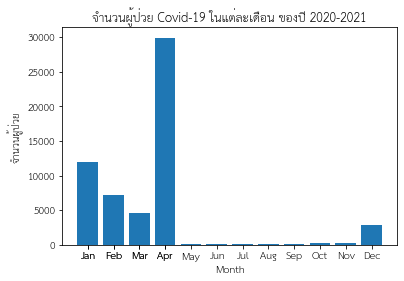

In [40]:
#bar chart ธรรมดา 
bar_chart = plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4],[covid19cases[(covid19cases['announce_date'].dt.month==1)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==2)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==3)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==4)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==5)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==6)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==7)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==8)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==9)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==10)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==11)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==12)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==1)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==2)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==3)].shape[0],
                                     covid19cases[(covid19cases['announce_date'].dt.month==4)].shape[0]
                                     ],tick_label=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']) #ชื่อแท่งกราฟของแต่ละแท่ง
plt.xlabel('Month') ##ชื่อแกน x
plt.ylabel('จำนวนผู้ป่วย') ##ชื่อแกน y
plt.title('จำนวนผู้ป่วย Covid-19 ในแต่ละเดือน ของปี 2020-2021'); ##ชื่อกราฟ

จากกราฟ 'จำนวนผู้ป่วย Covid-19 ในแต่ละเดือน ของปี 2020-2021' จะพบว่าในเดือนเมษายน 2020 จะมีจำนวนผู้ติดเชื้อสูงที่สุด 

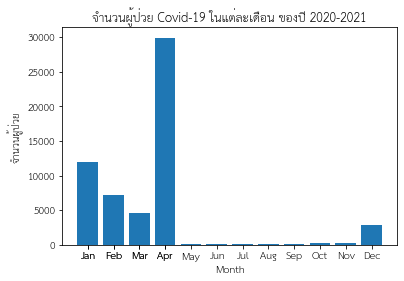

In [41]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4],[covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==1)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==2)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==3)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==4)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==5)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==6)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==7)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==8)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==9)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==10)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==11)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==12)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==1)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==2)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==3)].shape[0],
                                     covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==4)].shape[0]
                                     ],tick_label=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']) #ชื่อแท่งกราฟของแต่ละแท่ง
plt.xlabel('Month') ##ชื่อแกน x
plt.ylabel('จำนวนผู้ป่วย') ##ชื่อแกน y
plt.title('จำนวนผู้ป่วย Covid-19 ในแต่ละเดือน ของปี 2020-2021'); ##ชื่อกราฟ

แต่กราฟข้างบนสองอันค่าที่เป็นจำนวนผู้ป่วยตัวเลขมันยังไม่ถูก มันต้องใช้ .count()

###ค่าแสดงจำนวนผู้ป่วยโควิดในแต่ละเดือน

In [60]:
# plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4],
Co = [covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==1) & (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==2)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==3)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==4)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==5)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==6)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==7)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==8)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==9)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==10)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==11)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==12)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==1)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==2)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==3)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0],
         covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==4)& (covid19cases_updated['announce_date'].dt.year==2020)].count()[0]]
Co                                    
                                    # ],tick_label=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']) #ชื่อแท่งกราฟของแต่ละแท่ง
#plt.xlabel('Month') ##ชื่อแกน x
#plt.ylabel('จำนวนผู้ป่วย') ##ชื่อแกน y
#plt.title('จำนวนผู้ป่วย Covid-19 ในแต่ละเดือน ของปี 2020-2021'); ##ชื่อกราฟ

[19,
 23,
 1609,
 1303,
 127,
 90,
 139,
 102,
 152,
 216,
 218,
 2886,
 19,
 23,
 1609,
 1303]

In [64]:
new_passenger = [passenger.iloc[:,1:32].sum(axis=1)[4]
            ,passenger.iloc[:,32:61].sum(axis=1)[4]
            ,passenger.iloc[:,61:92].sum(axis=1)[4]
            ,passenger.iloc[:,92:122].sum(axis=1)[4]
            ,passenger.iloc[:,122:153].sum(axis=1)[4]
            ,passenger.iloc[:,153:183].sum(axis=1)[4]
            ,passenger.iloc[:,183:214].sum(axis=1)[4]
            ,passenger.iloc[:,214:245].sum(axis=1)[4]
            ,passenger.iloc[:,245:275].sum(axis=1)[4]
            ,passenger.iloc[:,275:306].sum(axis=1)[4]
            ,passenger.iloc[:,306:336].sum(axis=1)[4]
            ,passenger.iloc[:,336:367].sum(axis=1)[4]
            ,passenger.iloc[:,367:398].sum(axis=1)[4]
            ,passenger.iloc[:,398:426].sum(axis=1)[4]
            ,passenger.iloc[:,426:457].sum(axis=1)[4]
            ,passenger.iloc[:,457:].sum(axis=1)[4]]
new_passenger

IndexingError: ignored

###Grouped bar chart

แสดงจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน

In [ ]:
covid19cases_updated[(covid19cases_updated['announce_date'].dt.month==1)].shape[0] & (data_pass['date'].dt.year == 2020)].shape[0]  

In [ ]:
data_pass[(data_pass['date'].dt.year == 2020)].shape[0]  

###กราฟเปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน

In [45]:
labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20','Jan21','Feb21','Mar21','Apr21']

TypeError: ignored

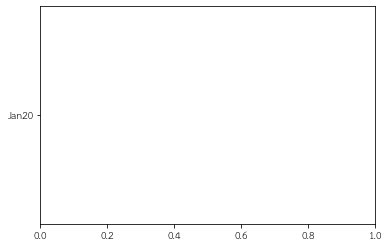

In [46]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, data_covid, width,  label='ผู้ป่วย', color = '#fc9700')
ax.barh(labels, data_pass, width, left=data_covid, label='การเดินทาง', color = '#19038a')

ax.set_ylabel('Number')
ax.set_title('เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน')
ax.legend()

plt.show()

##ข้อ 2. เปรียบเทียบวิธีการเดินทางของคนเป็นรายเดือนเทียบกับจำนวนผู้ป่วยในเดือนนั้นๆ


ตัวอย่างการสร้างกราฟเส้น
- ก่อนจะมีกราฟก็ต้องมีข้อมูลก่อน

In [47]:
Data = {'April': [111,531,58,421,256,90,147,500,40,150], 'May': [150,40,500,147,90,256,421,58,531,111] }

ต่อไปก็จะนำข้อมูลมาแปลงเป็น dataframe เพื่อนำไปพล็อทกราฟโดยจะต้อง import เครื่องมือของ panda คือ DataFrame 

In [48]:
from pandas import DataFrame
dataF = DataFrame(Data,columns=['April','May'])

In [49]:
print(dataF)

   April  May
0    111  150
1    531   40
2     58  500
3    421  147
4    256   90
5     90  256
6    147  421
7    500   58
8     40  531
9    150  111


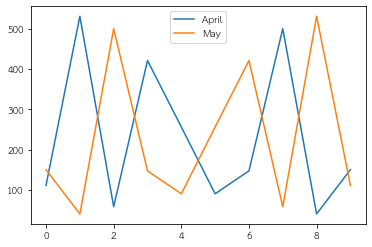

In [50]:
dataF.plot(kind="line")

###กราฟเส้นจำนวนผู้ป่วยโควิดในแต่ละเดือน ตั้งแต่ปี 2020 - 2021

In [51]:
DataF2 = DataFrame(data_covid,columns=['จำนวนผู้ป่วยโควิด'])
print(DataF2)

               จำนวนผู้ป่วยโควิด
announce_date                   
2020-01-31                    19
2020-02-29                    23
2020-03-31                  1609
2020-04-30                  1303
2020-05-31                   127
2020-06-30                    90
2020-07-31                   139
2020-08-31                   102
2020-09-30                   152
2020-10-31                   216
2020-11-30                   218
2020-12-31                  2886
2021-01-31                 11898
2021-02-28                  7169
2021-03-31                  2912
2021-04-30                 28647


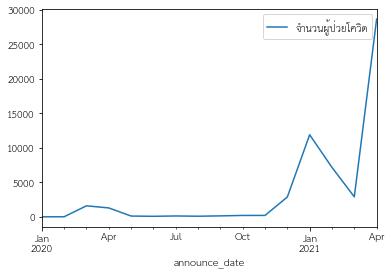

In [52]:
DataF2.plot(kind="line")

##ข้อ 3. เปรียบเทียบ จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของจังหวัด top 10 ของ 6 เดือนล่าสุด


In [ ]:
#หาจังหวัดที่มีคน click เข้าไปมากที่สุดสามอันดับแรก
#แบบเรียงจากมากไปน้อย
#search_click_df.groupby('city').count().sort_values('click_timestamp',ascending=False).iloc[:3,:]

In [ ]:
#top 10 ----> .iloc[0:10]

In [ ]:
covid19cases.head()

##ข้อ 4. เปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค

- สร้าง DataFrame เพื่อแยกออกเป็นภูมิภาค ใน column ของชื่อ region (ภูมิภาค)
- แล้วจึงเปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค

In [72]:
covid19cases_updated.head()

No. announce_date  ... province_of_onset district_of_onset
0    1    2020-01-12  ...     กรุงเทพมหานคร                 -
1    2    2020-01-17  ...     กรุงเทพมหานคร                 -
2    3    2020-01-22  ...            นครปฐม             เมือง
3    4    2020-01-22  ...     กรุงเทพมหานคร                 -
4    5    2020-01-24  ...     กรุงเทพมหานคร                 -

[5 rows x 11 columns]

In [73]:
Esan = pd.DataFrame(['อำนาจเจริญ', 'บึงกาฬ', 'บุรีรัมย์', 'ชัยภูมิ', 'กาฬสินธุ์', 'ขอนแก่น', 'เลย', 'มหาสารคาม', 'มุกดาหาร'
                    , 'นครพนม', 'นครราชสีมา', 'หนองบัวลำภู', 'หนองคาย', 'ร้อยเอ็ด', 'สกลนคร', 'ศรีสะเกษ', 'สุรินทร์', 'อุบลราชธานี', 'อุดรธานี', 'ยโสธร'],columns=['Province'])
Esan['Region'] = 'Northeast'

In [74]:
north = pd.DataFrame(['เชียงใหม่', 'เชียงราย', 'ลำปาง', 'ลำพูน', 'แม่ฮ่องสอน', 'น่าน', 'พะเยา', 'แพร่', 'อุตรดิตถ์'
                      ,'ตาก','สุโขทัย', 'พิษณุโลก', 'พิจิตร', 'กำแพงเพชร', 'เพชรบูรณ์','นครสวรรค์', 'อุทัยธานี'],columns=['Province'])
north['Region'] = 'North'

In [75]:
central = pd.DataFrame(['อ่างทอง', 'ชัยนาท', 'พระนครศรีอยุธยา', 'กรุงเทพมหานคร', 'ลพบุรี', 'นครปฐม', 'นนทบุรี', 'ปทุมธานี', 'สมุทรปราการ', 'สมุทรสาคร'
                        , 'สมุทรสงคราม', 'สระบุรี', 'สิงห์บุรี', 'สุพรรณบุรี','กาญจนบุรี', 'ราชบุรี','เพชรบุรี', 'ประจวบคีรีขันธ์'],columns=['Province'])
central['Region'] = 'Central'

In [76]:
east = pd.DataFrame(['ฉะเชิงเทรา', 'จันทบุรี', 'ชลบุรี', 'ปราจีนบุรี', 'ระยอง', 'สระแก้ว', 'ตราด'],columns=['Province'])
east['Region'] = 'East'

In [77]:
south = pd.DataFrame(['ชุมพร', 'นครศรีธรรมราช', 'นราธิวาส', 'ปัตตานี', 'พัทลุง', 'สงขลา', 'สุราษฎร์ธานี', 'ยะลา'
                     ,'กระบี่', 'พังงา', 'ภูเก็ต', 'ระนอง', 'สตูล', 'ตรัง'],columns= ['Province'])
south['Region'] = 'South'

In [90]:
Region = pd.concat([Esan,north,central,east,south])
Region.head()

Province     Region
0  อำนาจเจริญ  Northeast
1      บึงกาฬ  Northeast
2   บุรีรัมย์  Northeast
3     ชัยภูมิ  Northeast
4   กาฬสินธุ์  Northeast

In [97]:
new_covid = covid19cases_updated.merge(Region,how='left',left_on='province_of_isolation',right_on='Province')
new_covid.columns

Index(['No.', 'announce_date', 'Notified date', 'sex', 'age', 'Unit',
       'nationality', 'province_of_isolation', 'risk', 'province_of_onset',
       'district_of_onset', 'Province', 'Region'],
      dtype='object')

In [99]:
new_covid['sex'] = new_covid['sex'].fillna('ไม่ทราบข้อมูล')
new_covid[new_covid['sex'].isnull()]

Empty DataFrame
Columns: [No., announce_date, Notified date, sex, age, Unit, nationality, province_of_isolation, risk, province_of_onset, district_of_onset, Province, Region]
Index: []

In [101]:
covid19_p = pd.DataFrame(new_covid.groupby('Region')['No.'].count().sort_values(ascending=False)).reset_index()

In [102]:
covid19_p.rename(columns={'No.':'No.'},inplace=True)

###กราฟแท่งแสดงจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค

<BarContainer object of 5 artists>

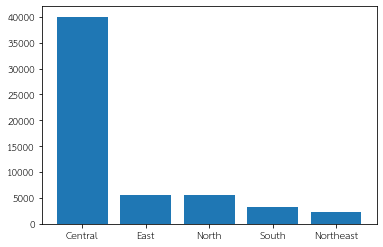

In [104]:
plt.bar(covid19_p['Region'],covid19_p['No.']) 

##save table

Save to use with other applications

In [111]:
new_covid.to_csv('new_covid.csv', index = False)

In [112]:
! cat new_covid.csv

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
4354,2020-12-20,19/12/2020,หญิง,24.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,บางละมุง,ชลบุรี,East
4355,2020-12-20,19/12/2020,หญิง,34.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,บางละมุง,ชลบุรี,East
4356,2020-12-20,19/12/2020,หญิง,30.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,บางละมุง,ชลบุรี,East
4357,2020-12-20,19/12/2020,หญิง,38.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,บางละมุง,ชลบุรี,East
4358,2020-12-20,19/12/2020,หญิง,48.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,บางละมุง,ชลบุรี,East
4359,2020-12-20,19/12/2020,หญิง,45.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,บางละมุง,ชลบุรี,East
4360,2020-12-20,19/12/2020,หญิง,26.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,บางละมุง,ชลบุรี,East
4361,2020-12-20,19/12/2020,หญิง,46.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,บางละมุง,ชลบุรี,East
4362,2020-12-20,19/12/2020,หญิง,44.0,ปี,Thailand,ชลบุรี,State Quarantine,ชลบุรี,บางละมุง,ชลบุรี,East
4363,2020-12-20,19/12/2020,หญิง,29

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
41303,2021-04-18,17/4/2021,หญิง,29.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,-,ดินแดง,กรุงเทพมหานคร,Central
41304,2021-04-18,17/4/2021,หญิง,26.0,ปี,Thailand,กรุงเทพมหานคร,Cluster ผับ Thonglor,-,-,กรุงเทพมหานคร,Central
41305,2021-04-18,17/4/2021,ชาย,54.0,ปี,Thailand,กรุงเทพมหานคร,สถานบันเทิง,กรุงเทพมหานคร,พระนคร,กรุงเทพมหานคร,Central
41306,2021-04-18,17/4/2021,ชาย,23.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สมุทรสาคร,เมืองสมุทรสาคร,กรุงเทพมหานคร,Central
41307,2021-04-18,17/4/2021,ชาย,57.0,ปี,Thailand,กรุงเทพมหานคร,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,กรุงเทพมหานคร,ดุสิต,กรุงเทพมหานคร,Central
41308,2021-04-18,17/4/2021,ชาย,42.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สมุทรสาคร,เมืองสมุทรสาคร,กรุงเทพมหานคร,Central
41309,2021-04-18,17/4/2021,ชาย,44.0,ปี,Thailand,กรุงเทพมหานคร,สถานบันเทิง,กรุงเทพมหานคร,สายไหม,กรุงเทพมหานคร,Central
41310

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



นหน้านี้,นครศรีธรรมราช,-,นครศรีธรรมราช,South
55612,2021-04-26,25/4/2021,หญิง,5.0,ปี,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,เคียนซา,สุราษฎร์ธานี,South
55613,2021-04-26,25/4/2021,หญิง,51.0,ปี,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,บ้านนาสาร,สุราษฎร์ธานี,South
55614,2021-04-26,25/4/2021,หญิง,25.0,ปี,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,บ้านนาสาร,สุราษฎร์ธานี,South
55615,2021-04-26,25/4/2021,ชาย,56.0,ปี,Thailand,สุราษฎร์ธานี,อยู่ระหว่างการสอบสวน,สุราษฎร์ธานี,เมือง,สุราษฎร์ธานี,South
55616,2021-04-26,25/4/2021,ชาย,16.0,ปี,Thailand,สุราษฎร์ธานี,สถานบันเทิง,สุราษฎร์ธานี,เมือง,สุราษฎร์ธานี,South
55617,2021-04-26,25/4/2021,หญิง,5.0,ปี,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,พุนพิน,สุราษฎร์ธานี,South
55618,2021-04-26,25/4/2021,ชาย,32.0,ปี,Thailand,สุราษฎร์ธานี,อยู่ระหว่างการสอบสวน,สุราษฎร์ธานี,เมือง,สุราษฎร์ธานี,South
55619,2021-04-26,25